In [159]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import matplotlib.patches as mpatches
from matplotlib.pyplot import figure
import numpy as np





df_CTS = pd.read_csv('C:/Users/thoma/OneDrive/Documents/CIBA/CTBA/CTBA/M3/ConstructionTimeSeriesDataV2.csv') #bring in data

df_CTS

,Month,Month-Year,Total Construction,Private Construction,Public Construction
0,1,Jan-02,59516,45273,14243
1,2,Feb-02,58588,44475,14113
2,3,Mar-02,63782,49396,14386
3,4,Apr-02,69504,53283,16221
4,5,May-02,73384,55009,18375
...,...,...,...,...,...
141,142,Oct-13,85193,59370,25823
142,143,Nov-13,77931,55191,22741
143,144,Dec-13,71502,52132,19369
144,145,Jan-14,64661,47827,16834


In [160]:
Year = df_CTS['Month-Year'].str[4:] #strip the year from the date column

df_CTS['Year'] = Year #add column to df





In [161]:
df_CTS

,Month,Month-Year,Total Construction,Private Construction,Public Construction,Year
0,1,Jan-02,59516,45273,14243,02
1,2,Feb-02,58588,44475,14113,02
2,3,Mar-02,63782,49396,14386,02
3,4,Apr-02,69504,53283,16221,02
4,5,May-02,73384,55009,18375,02
...,...,...,...,...,...,...
141,142,Oct-13,85193,59370,25823,13
142,143,Nov-13,77931,55191,22741,13
143,144,Dec-13,71502,52132,19369,13
144,145,Jan-14,64661,47827,16834,14


In [162]:
df_CTS.groupby(['Year'])['Private Construction','Public Construction'].mean()
Private_Yearly_AVG= df_CTS.groupby(df_CTS.Year)['Private Construction'].transform('mean') #get yearly average
df_CTS['Private_Yearly_AVG'] = Private_Yearly_AVG #add column to df
Public_Yearly_AVG= df_CTS.groupby(df_CTS.Year)['Public Construction'].transform('mean') #get yearly average
df_CTS['Public_Yearly_AVG'] = Public_Yearly_AVG #add column to df
df_drop=df_CTS.drop_duplicates(subset='Year', keep="last") #drop duplicates
df_drop=df_CTS.drop_duplicates(subset='Year', keep="last") #drop duplicates
df_drop['Year'] = '20' + df_drop['Year'].astype(str)

C:\Users\thoma\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


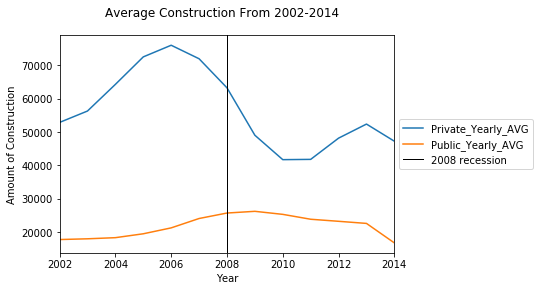

In [169]:
df_drop

ax = df_drop.set_index('Year')['Private_Yearly_AVG'].plot()
ax = df_drop.set_index('Year')['Public_Yearly_AVG'].plot()
ax.axvline(x=6, ymin = 0, ymax =100000, linewidth=1, color= 'k',label= '2008 recession',linestyle= '-')
plt.legend(['Private Construction = Blue', 'Public Construction = Orange'])

ax.set_ylabel("Amount of Construction") #ylabel
plt.suptitle('Average Construction From 2002-2014', fontsize=12) #names titles at axis


ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


The graph above articulates that there is a greater number of Private construction projects compared to public construction. During the recession in 2008, you see a dip in private construction, but a slight increase in public. I predicted that private construction would drop, however was surprised to see the increase in public construction.

In [164]:
Year = df_CTS['Month-Year'].str[:3] #strip the year from the date column

df_CTS['Month'] = Year #add column to df



In [165]:
df_CTS

,Month,Month-Year,Total Construction,Private Construction,Public Construction,Year,Private_Yearly_AVG,Public_Yearly_AVG
0,Jan,Jan-02,59516,45273,14243,02,52869.916667,17786.5
1,Feb,Feb-02,58588,44475,14113,02,52869.916667,17786.5
2,Mar,Mar-02,63782,49396,14386,02,52869.916667,17786.5
3,Apr,Apr-02,69504,53283,16221,02,52869.916667,17786.5
4,May,May-02,73384,55009,18375,02,52869.916667,17786.5
...,...,...,...,...,...,...,...,...
141,Oct,Oct-13,85193,59370,25823,13,52376.416667,22619.5
142,Nov,Nov-13,77931,55191,22741,13,52376.416667,22619.5
143,Dec,Dec-13,71502,52132,19369,13,52376.416667,22619.5
144,Jan,Jan-14,64661,47827,16834,14,47237.000000,16777.5


In [166]:
df_CTS.groupby(['Month'])['Total Construction'].mean()
AVG_Monthly_Total_Construction= df_CTS.groupby(df_CTS.Month)['Total Construction'].transform('mean') #get yearly average
df_CTS['AVG_Monthly_Total_Construction'] =Monthly_Total_Construction #add column to df

df_drop1=df_CTS.drop_duplicates(subset='Month', keep= "first") #drop duplicates

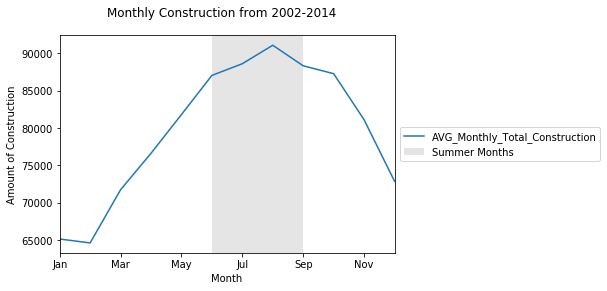

In [168]:
df_drop1

ax = df_drop1.set_index('Month')['AVG_Monthly_Total_Construction'].plot()



ax.set_ylabel("Amount of Construction") #ylabel
plt.suptitle('Monthly Construction from 2002-2014', fontsize=12) #names titles at axis
ax.axvspan(5,8,ymin=0,ymax=300,facecolor='k',alpha = 0.1,label='Summer Months')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


This graph averages the total monthly construction from 2002-2014. This graph confirmed my preconceived assumption that more construction happens in the summer months. 